# EV Car Prices

This assignment focuses on car prices. The data ('car_prices.xlsx') is a pre-processed version of original data scraped from bilbasen.dk by previous MAL1 students. The dataset contains 16 columns:

- **Price (DKK)**: The current listed price of the vehicle in Danish Kroner.
- **Model Year**: The manufacturing year of the vehicle.
- **Mileage (km)**: The total kilometres driven by the vehicle (odometer reading).
- **Electric Range (km)**: The estimated maximum driving range on a full charge.
- **Battery Capacity (kWh)**: The total capacity of the vehicle's battery in kilowatt-hours.
- **Energy Consumption (Wh/km)**: The vehicle's energy consumption in watt-hours per kilometre.
- **Annual Road Tax (DKK)**: The annual road tax cost in Danish Kroner.
- **Horsepower (bhp)**: The vehicle's horsepower (brake horsepower).
- **0-100 km/h (s)**: The time (in seconds) for the car to accelerate from 0 to 100 km/h.
- **Top Speed (km/h)**: The maximum speed the vehicle can achieve.
- **Towing Capacity (kg)**: The maximum weight the vehicle can tow.
- **Original Price (DKK)**: The price of the vehicle when first sold as new.
- **Number of Doors**: The total number of doors on the vehicle.
- **Rear-Wheel Drive**: A binary indicator (1 = Yes, 0 = No) for rear-wheel drive.
- **All-Wheel Drive (AWD)**: A binary indicator (1 = Yes, 0 = No) for all-wheel drive.
- **Front-Wheel Drive**: A binary indicator (1 = Yes, 0 = No) for front-wheel drive.

The first one, **Price**, is the response variable.

The **objective** of this assignment is:
1. Understand how linear algebra is used in Machine Learning, specifically for correlations and regression
2. Learn how to perform multiple linear regression, ridge regression, lasso regression and elastic net
3. Learn how to assess regression models

Please solve the tasks using this notebook as you template, i.e. insert code blocks and markdown block to this notebook and hand it in. Please use 42 as your random seed.


## Import data
 - Import the dataset 
 - Split the data in a training set and test set - make sure you extract the response variable
 - Remember to use the data appropriately; in the tasks below, we do not explicitly state when to use train and test - but in order to compare the models, you must use the same dataset for training and testing in all models.
 - Output: When you are done with this, you should have the following sets: `X` (the original dataset), `X_train`, `X_train`, `X_test`, `y_train`, `y_test`

In [1]:
# Code block for important and creating data sets. Add more code blocks if needed.

# Import required libraries:
# pip install openpyxl
import pandas as pd
import sklearn as sk
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt
from sklearn.linear_model import LinearRegression, SGDRegressor, RidgeCV, Ridge, LassoCV, Lasso
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures


# Load Data:
data = pd.read_excel('car_prices.xlsx')

# Display some of the data for visual inspection:
print("# Head of the raw Data for visual inspection:")
display(data.head())

# Define the X (features)) and the Y (targets / response variables):
Y = data['Price (DKK)']
X = data.drop(columns=['Price (DKK)'])

# Now we use StandardScaler to scale the feature set:
#scaler = StandardScaler()
#X = scaler.fit_transform(X)

# Define train data and test data. We use 85% for training and 15% for testing:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.15, random_state=42)

print("\n\n# Head of the training Feature Set for visual inspection:")
display(X_train.head())

# Head of the raw Data for visual inspection:


,Price (DKK),Model Year,Mileage (km),Electric Range (km),Battery Capacity (kWh),Energy Consumption (Wh/km),Annual Road Tax (DKK),Horsepower (bhp),0-100 km/h (s),Top Speed (km/h),Towing Capacity (kg),Original Price (DKK),Number of Doors,Rear-Wheel Drive,All-Wheel Drive (AWD),Front-Wheel Drive
0,199900,2024,3000,270,39.0,168,780,147,7.9,144,1000,250720,5,0,0,1
1,455555,2024,1001,536,82.0,177,780,408,4.9,180,1800,462900,5,0,1,0
2,309900,2024,4000,460,64.8,162,780,204,7.8,167,750,345620,5,0,0,1
3,425362,2024,10,550,76.6,153,780,286,6.7,180,1000,395615,5,1,0,0
4,749900,2024,0,505,99.8,228,780,384,5.3,200,2500,745520,5,0,1,0




# Head of the training Feature Set for visual inspection:


,Model Year,Mileage (km),Electric Range (km),Battery Capacity (kWh),Energy Consumption (Wh/km),Annual Road Tax (DKK),Horsepower (bhp),0-100 km/h (s),Top Speed (km/h),Towing Capacity (kg),Original Price (DKK),Number of Doors,Rear-Wheel Drive,All-Wheel Drive (AWD),Front-Wheel Drive
503,2023,5500,534,76.6,164,780,204,8.4,160,1000,415714,5,1,0,0
4888,2023,12000,600,88.0,173,780,294,7.0,180,1000,497965,5,1,0,0
2549,2021,35000,270,39.0,171,780,147,7.9,144,1000,245820,5,0,0,1
3583,2019,78000,285,37.9,131,780,170,7.3,150,1000,315020,5,1,0,0
486,2023,600,478,66.0,160,780,286,6.0,190,750,475675,5,1,0,0


## Part 1: Linear Algebra
In this assignment, you have to solve all problems using linear algebra concepts. You are free to use SymPy or NumPy - though NumPy is **significantly** more efficient computationally than SymPy since NumPy is optimized for numerical computations with floating-point arithmetic. Since linear regression is purely numerical, NumPy is the better choice.


### Task 1: Regression



Linear regression finds the best-fitting line (or hyperplane) by solving for the **coefficient vector** $\mathbf{B}$ that minimizes the squared error:

$$
\mathbf{B} = (\mathbf{X}^T \mathbf{X})^{-1} \mathbf{X}^T \mathbf{y}
$$

where:
- $\mathbf{X}$ is the **design matrix**, including a column of ones for the intercept.
- $\mathbf{y}$ is the **response variable** (target values).
- $\mathbf{B}$ contains the **regression coefficients**.

**Explanation of Each Step**
1. **Construct the matrix $X$**:
   - Each **row** represents a data point.
   - Each **column** represents a feature.
   - The **first column is all ones** to account for the **intercept**.

2. **Solve for $\mathbf{B}$ using the normal equation**:
   - Compute $X^T X$ (feature correlation).
   - Compute $X^T y$ (cross-product with the target variable).
   - Compute the **inverse of $X^T X$** and multiply by $X^T y$ to get $\mathbf{B}$.

3. **Interpret the results**:
   - The **first value** in $\mathbf{B}$ is the **intercept**.
   - The remaining values are the **coefficients for each feature**.



In [2]:
# Use this for Task 1. Add more code blocks if needed.

# Step 1: Constructing the matrix.
## We iterate through all feature columns, ensuring to add a 1 to the first columns as the intercept.
df = pd.DataFrame(X_train)

## Define the variable that will hold the built matrix. Note a matrix in python is expresses as arrays within arrays [[row1],[row2] [etc.]], where each array within the array is a row.
X_matrix = []

## iterate over all rows in the training data set.
for row in df.itertuples(index=False):
    ### For each row, build an array containing the intercept [1] and all the other column values.
    row_to_add = [1]
    for item in row:
        row_to_add.append(item)

    ### Add the array to the main matrix.
    X_matrix.append(row_to_add)

## Convert it to a numpy array, to gain access to transpose method and other numpy array operations.
X_matrix = np.array(X_matrix)

print("\n\n# This is the first row of the built Matrix:\n", X_matrix[0])

# Step 2: Solving for B, using the normal equation:
## In order to compute the feature correlation matrix (XTX) we must first compute the transpose of X (Swapping rows and columns):

### Define the transposed matrix:
X_matrix_transpose = X_matrix.transpose()
print("\nThis is the first row of the transposed Matrix:\n", X_matrix_transpose[0])

### To find XTX we multiply the transposed Matrix with the non-transposed Matrix:
XTX_matrix = np.matmul(X_matrix_transpose, X_matrix)
print("\nThis is the first row of the XTX Matrix:\n", XTX_matrix[0])

### Now we find the inverse of the XTX matrix:
XTX_neg1_matrix = np.linalg.inv(XTX_matrix)
print("\nThis is the first row of the inverse XTX Matrix. It helps undo the effects of feature correlation:\n", XTX_neg1_matrix[0])

### Now we find the pseudo inverse of the transposed matrix:
XT_pseudoInverse = np.matmul(XTX_neg1_matrix, X_matrix_transpose)
print("\nThis is the first row of the pseudo inverse matrix:\n", XT_pseudoInverse[0])

### Finally we can now compute the B value (which is also referred to as Theta or Alpha in other documentation):
Beta = np.matmul(XT_pseudoInverse, Y_train.to_numpy())
print("\nThe computed Beta value is:\n", Beta)



# This is the first row of the built Matrix:
 [1.00000e+00 2.02300e+03 5.50000e+03 5.34000e+02 7.66000e+01 1.64000e+02
 7.80000e+02 2.04000e+02 8.40000e+00 1.60000e+02 1.00000e+03 4.15714e+05
 5.00000e+00 1.00000e+00 0.00000e+00 0.00000e+00]

This is the first row of the transposed Matrix:
 [1. 1. 1. ... 1. 1. 1.]

This is the first row of the XTX Matrix:
 [5.29200000e+03 1.07012830e+07 1.19102591e+08 2.30036000e+06
 3.46622800e+05 9.02782000e+05 4.15064000e+06 1.30736800e+06
 3.91500000e+04 9.09135000e+05 6.02560500e+06 2.18098773e+09
 2.53930000e+04 1.99300000e+03 1.26700000e+03 2.03200000e+03]

This is the first row of the inverse XTX Matrix. It helps undo the effects of feature correlation:
 [ 4.87839874e+12  6.11126571e-01  1.97727572e-05 -3.45247377e-03
 -1.84945494e-04 -6.50658515e-03  2.68732980e-03  1.43300857e-03
  7.75350228e-02 -1.66302895e-03 -1.89856822e-04  3.92637103e-07
  9.42721339e-02 -4.87839874e+12 -4.87839874e+12 -4.87839874e+12]

This is the first row of the ps

In [3]:
print("\nThe computed intercept and coefficients are: ",
      "\nintercept:", Beta[0],
      "\nModel Year:", Beta[1],
      "\nMileage (km): ", Beta[2],
      "\nElectric Range (km): ", Beta[3],
      "\nBattery Capacity (kWh): ", Beta[4],
      "\nEnergy Consumption (Wh/km)", Beta[5],
      "\nAnnual Road Tax (DKK)", Beta[6],
      "\nHorsepower (bhp)", Beta[7],
      "\n0-100 km/h (s)", Beta[8],
      "\nTop Speed (km/h)", Beta[9],
      "\nTowing Capacity (kg)", Beta[10],
      "\nOriginal Price (DKK)", Beta[11],
      "\nNumber of Doors", Beta[12],
      "\nRear-Wheel Drive", Beta[13],
      "\nAll-Wheel Drive (AWD)", Beta[14],
      "\nFront-Wheel Drive", Beta[15])


The computed intercept and coefficients are:  
intercept: -6791451037.95939 
Model Year: 3397385.0331573216 
Mileage (km):  108.15615387621123 
Electric Range (km):  -25511.429318525756 
Battery Capacity (kWh):  7693.86836532664 
Energy Consumption (Wh/km) -42159.88195362281 
Annual Road Tax (DKK) 18047.949790830764 
Horsepower (bhp) 18385.299821548684 
0-100 km/h (s) 305251.4352229618 
Top Speed (km/h) -21891.593286654544 
Towing Capacity (kg) -907.2029247442617 
Original Price (DKK) 2.9851183016685923 
Number of Doors 509416.10500763037 
Rear-Wheel Drive -83376323.78621855 
All-Wheel Drive (AWD) -84039363.60531195 
Front-Wheel Drive -83273138.28763238


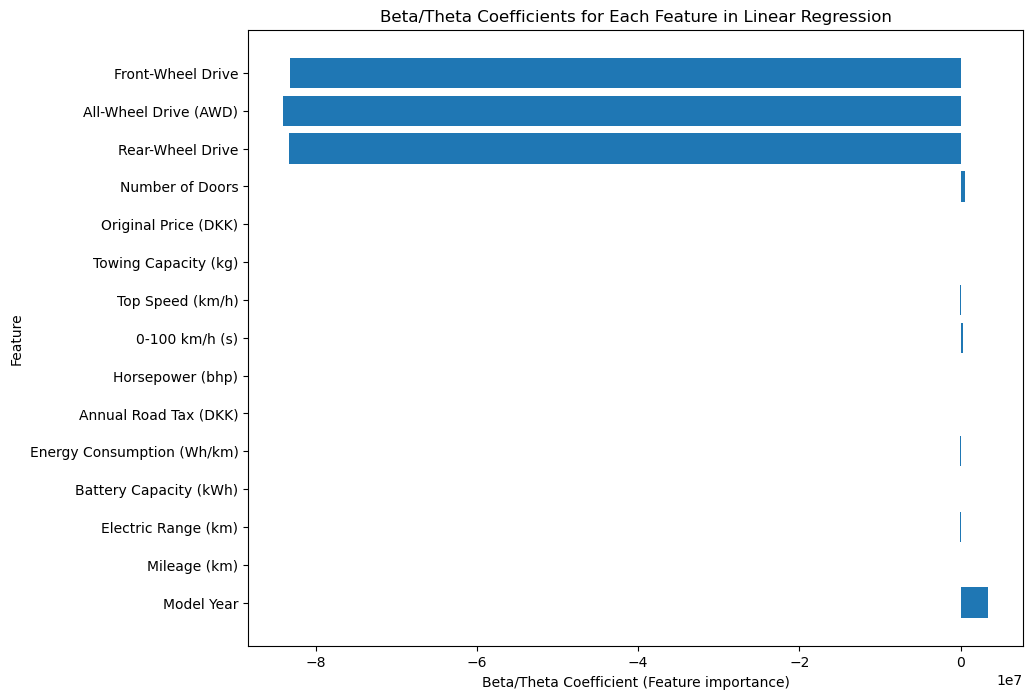

Interpreting results:
Based on the graph, we see that the primary features influencing vehicle price are:
1. Front-Wheel Drive
2. All-Wheel Drive (AWD)
3. Rear-Wheel Drive
4. Model Year (Only slight influence)

In conclusion most other features have little to no impact of vehicle price, if using only linear regression to predict price. As such, this is not a good model, since it is too unevenly balanced.


In [33]:
##Now let's visualize this data. We ignore the intercept in this visualization.

# When visualizing/interpreting the data, we skip the intercept. This is to better see how important each feature is, after linear regression.
values = Beta[1:]

n_features = len(values)
plt.figure(figsize=(10,8))
plt.barh(range(n_features), values, align='center')
plt.yticks(np.arange(n_features), X.columns)
plt.title("Beta/Theta Coefficients for Each Feature in Linear Regression")
plt.xlabel('Beta/Theta Coefficient (Feature importance)')
plt.ylabel('Feature')

# Show the plot
plt.show()

print("Interpreting results:\n"
      "Based on the graph, we see that the primary features influencing vehicle price are:\n1. Front-Wheel Drive\n2. All-Wheel Drive (AWD)\n3. Rear-Wheel Drive\n4. Model Year (Only slight influence)"
      "\n\nIn conclusion most other features have little to no impact of vehicle price, if using only linear regression to predict price. As such, this is not a good model, since it is too unevenly balanced.")

Task 2: Evaluating the Model

Once we have the regression coefficients $\mathbf{B}$, we can evaluate how well the model fits the data using two key metrics:

1. **Mean Squared Error (MSE)** – Measures the average squared difference between the predicted and actual values:
   $$
   MSE = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2
   $$
   - Lower MSE means better fit.

2. **$R^2$ (Coefficient of Determination)** – Measures how much of the variance in $y$ is explained by $X$:
   $$
   R^2 = 1 - \frac{\sum (y - \hat{y})^2}{\sum (y - \bar{y})^2}
   $$
   - $R^2$ ranges from **0 to 1**, where **1** indicates a perfect fit and **0** means the model explains no variance.


**Explanation of Each Step**
1. **Compute Predictions**:  
   $$ \hat{y} = X B $$
   This gives the model’s predicted values.

2. **Compute MSE**:  
   - We square the residuals $ (y - \hat{y})^2 $ and take the mean.

3. **Compute $R^2$**:
   - **Total sum of squares** $ SS_{total} $ measures the total variance in $ y $.
   - **Residual sum of squares** $ SS_{residual} $ measures the variance left unexplained by the model.
   - $ R^2 $ tells us what fraction of variance is explained.

**Interpreting the Results**
- **MSE**: Lower values indicate a better fit.
- **$R^2$ Score**:
  - **$R^2 = 1$** → Perfect fit (all points on the regression line).
  - **$R^2 = 0$** → Model is no better than predicting the mean of $ y $.
  - **$R^2 < 0$** → Model performs worse than a simple average.

Implement the above steps using linear algebra so that you both create a regression model and calculate the MSE and $R^2$. Note, here you need to use `X_train`, `X_test`, `y_train` and `y_test` appropriately!


In [5]:
# Use this for Task 2. Add more code blocks if needed.

# Part 2: Using Library Functions

### Task 4: Correlation and OLS
For this task you must do the following
 - Using library functions, build the following models:
   - Correlation matrix where the correlations are printed in the matrix and a heat map is overlaid
   - Ordinary least squares
   - Performance metrics: MSE, RMSE, $R^2$
   - Comment on the real world meaning of RMSE and $R^2$


In [6]:
# Use this for Task 4. Add more code blocks if needed.

### Task 5: Ridge, Lasso and Elastic Net
In order for Ridge and Lasso (and Elastic net) to have an effect, you must use scaled data to build the models, since regularization depends on coefficient magnitude, and if using non-scaled data the penalty will affect them unequally. Feel free to use this code to scale the data:

```python
# Standardize X
scaler_X = StandardScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

# Standardize y
scaler_y = StandardScaler()
y_train_scaled = scaler_y.fit_transform(y_train.reshape(-1, 1)).flatten()
y_test_scaled = scaler_y.transform(y_test.reshape(-1, 1)).flatten()
```
For the final task you must do the following
   - Ridge regression (using multiple alphas)
   - Lasso regression (using multiple alphas)
   - Elastic Net (using multiple alphas)
 - Discussion and conclusion:
   - Discuss the MSE and $R^2$ of all 3 models and conclude which model has the best performance - note the MSE will be scaled!
   - Rebuild the OLS model from Task 4, but this time use the scaled data from this task - interpret the meaning of the model's coefficients
   - Use the coefficients of the best ridge and lasso model to print the 5 most important features and compare to the 5 most important features in the OLS with scaled data model. Do the models agree about which features are the most important?

Note: You may get a convergence warning; try increasing the `max_iter` parameter of the model (the default is 1000 - maybe set it to 100000)

In [7]:
# Use this for Task 5. Add more code blocks if needed.